<a href="https://colab.research.google.com/github/dffesalbon/machine-learning-sample/blob/main/Breast%20Cancer%20Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-plot

In [ ]:
import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50) 

In [ ]:
#df = pd.read_csv('../input/breast-cancer-dataset/breast-cancer.csv')
df = pd.read_csv('/content/sample_data/breast-cancer.csv')
df.drop(['id'],axis=1, inplace=True)

target = 'diagnosis'
labels = ['Benign','Malignant']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Inference: The Datset consists of 31 features & 569 samples.


In [ ]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

diagnosis                    2
smoothness_worst           411
symmetry_mean              432
radius_mean                456
radius_worst               457
smoothness_mean            474
texture_mean               479
concave points_worst       492
symmetry_se                498
fractal_dimension_mean     499
symmetry_worst             500
concave points_se          507
texture_worst              511
perimeter_worst            514
texture_se                 519
perimeter_mean             522
area_se                    528
compactness_worst          529
perimeter_se               533
concavity_se               533
fractal_dimension_worst    535
concavity_mean             537
compactness_mean           537
concavity_worst            539
area_mean                  539
radius_se                  540
compactness_se             541
concave points_mean        542
area_worst                 544
fractal_dimension_se       545
smoothness_se              547
dtype: int64

In [ ]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])
    
print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 30 numerical & 0 categorical features.


In [ ]:
#Checking the stats of all the columns

display(df.describe())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


            Target Variable Distribution           


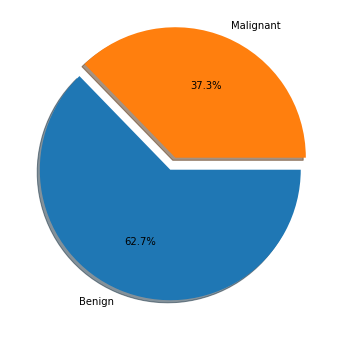

In [ ]:
#Let us first analyze the distribution of the target variable

MAP={}
for e, i in enumerate(sorted(df[target].unique())):
    MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
df1 = df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

In [ ]:
#Visualising the categorical features 

#print('\033[1mVisualising Categorical Features:'.center(100))

#n=3

#plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

#for i in range(len(cf)):
#    if df[cf[i]].nunique()<=6:
#        plt.subplot(math.ceil(len(cf)/n),n,i+1)
#        sns.countplot(df[cf[i]])
#    else:
#        plt.subplot(3,1,i-1)
#        sns.countplot(df[cf[i]])
#plt.tight_layout()
#plt.show()

                                     Features Distribution                                      


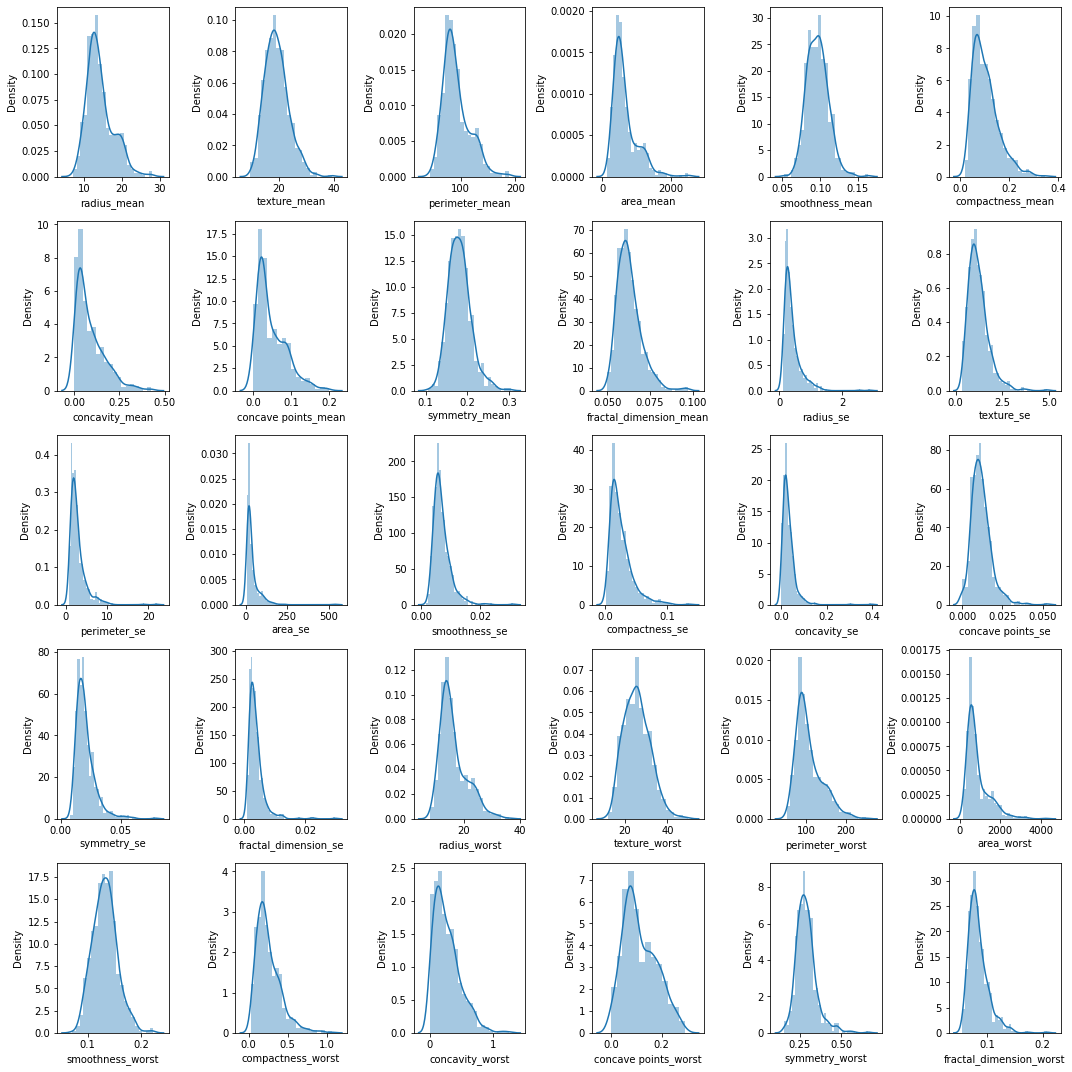

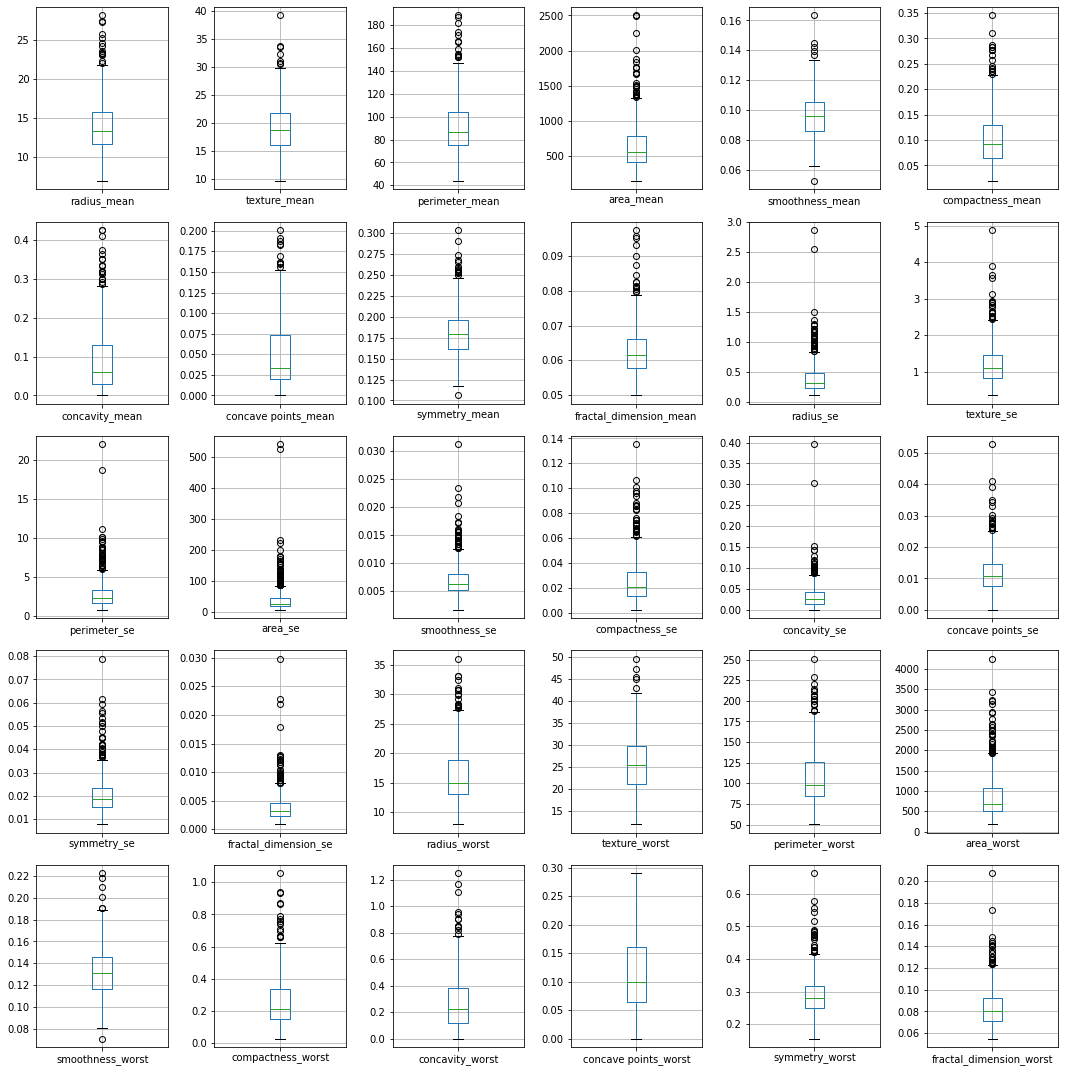

In [ ]:
#Understanding the feature set

print('\033[1mFeatures Distribution'.center(100))

n=6
nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

In [ ]:
#Understanding the relationship between all the features

# g=sns.pairplot(df1, hue=target, size=4)
# g.map_upper(sns.kdeplot, levels=1, color=".2")
# plt.show()

In [ ]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = original_df.shape

df1 = df.copy()
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [ ]:
#Check for empty elements

nvc = pd.DataFrame(df1.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df1.shape[0],3)*100
print(nvc)

                         Total Null Values  Percentage
diagnosis                                0         0.0
concave points_worst                     0         0.0
concavity_worst                          0         0.0
compactness_worst                        0         0.0
smoothness_worst                         0         0.0
area_worst                               0         0.0
perimeter_worst                          0         0.0
texture_worst                            0         0.0
radius_worst                             0         0.0
fractal_dimension_se                     0         0.0
symmetry_se                              0         0.0
concave points_se                        0         0.0
concavity_se                             0         0.0
compactness_se                           0         0.0
symmetry_worst                           0         0.0
smoothness_se                            0         0.0
perimeter_se                             0         0.0
texture_se

In [ ]:
#Converting categorical Columns to Numeric

#df1 = df.copy()
ecc = nvc[nvc['Percentage']!=0].index.values
dcc = [i for i in df.columns if i not in ecc]

#Target Variable
MAP={}
for i,e in enumerate(df1[target].unique()):
    MAP[e]=i
df1[target]=df1[target].map(MAP)
print('Mapping Target variable --->',MAP)

df3 = df1[dcc]
fcc = [i for i in cf if i not in ecc]

#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1m\nOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

Mapping Target variable ---> {'M': 0, 'B': 1}


(569, 31)

In [ ]:
#Removal of outlier:

df4 = df3.copy()

for i in [i for i in df4.columns]:
    if df4[i].nunique()>=12:
        Q1 = df4[i].quantile(0.15)
        Q3 = df4[i].quantile(0.85)
        IQR = Q3 - Q1
        df4 = df4[df4[i] <= (Q3+(1.5*IQR))]
        df4 = df4[df4[i] >= (Q1-(1.5*IQR))]
df4 = df4.reset_index(drop=True)
display(df4)
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(df1.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(df4.shape[0]))

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.18600,0.2750,0.08902
1,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.24300,0.3613,0.08758
2,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.16250,0.2364,0.07678
3,0,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.17410,0.3985,0.12440
4,0,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.19320,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,1,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,0.2388,2.9040,1.936,16.97,0.008200,0.02982,0.05738,0.01267,0.01488,0.004738,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
498,1,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,0.3645,1.4920,2.888,29.84,0.007256,0.02678,0.02071,0.01626,0.02080,0.005304,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
499,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
500,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820



Inference: Before removal of outliers, The dataset had 569 samples.
Inference: After removal of outliers, The dataset now has 502 samples.


In [ ]:
#Fixing the imbalance using SMOTE Technique

df5 = df4.copy()

print('Original class distribution:')
print(df5[target].value_counts())

xf = df5.columns
X = df5.drop([target],axis=1)
Y = df5[target]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df5 = pd.DataFrame(X, columns=xf)
df5[target] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
1    337
0    165
Name: diagnosis, dtype: int64

Class distribution after applying SMOTE Technique:
1    337
0    337
Name: diagnosis, dtype: int64


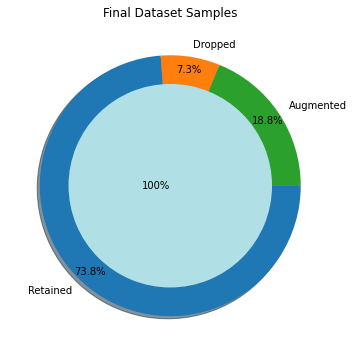


Inference:The final dataset after cleanup has 674 samples & 31 columns.


In [ ]:
#Final Dataset size after performing Preprocessing

df = df5.copy()
plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_df.shape[0]-df4.shape[0], df5.shape[0]-df4.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} columns.'.format(df.shape[0], df.shape[1]))

In [ ]:
#Splitting the data intro training & testing sets

df = df5.copy()

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (674, 30) (674,) 
Training set  --->  (539, 30) (539,) 
Testing set   --->  (135, 30)  (135,)


In [ ]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02,5.390000e+02
mean,-3.306724e-16,-7.677841e-16,-5.242148e-17,-3.713596e-16,-1.197146e-15,8.053751e-17,-5.602610e-17,-3.954783e-17,-9.738654e-16,1.222893e-15,9.866360e-17,-2.624228e-16,-1.155538e-16,-7.301931e-17,1.209093e-16,1.315429e-16,5.643805e-17,1.188495e-16,6.136608e-16,1.095805e-16,2.718914e-16,3.032001e-16,-5.993968e-17,-2.782767e-16,-2.537653e-16,-2.175131e-16,8.774675e-17,1.254408e-16,-4.234914e-16,3.831196e-16
std,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00,1.000929e+00
min,-2.313945e+00,-2.329669e+00,-2.273366e+00,-1.724890e+00,-3.523322e+00,-1.973840e+00,-1.371981e+00,-1.498931e+00,-2.736949e+00,-2.210425e+00,-1.379579e+00,-1.774409e+00,-1.443775e+00,-1.125995e+00,-1.801477e+00,-1.770436e+00,-1.787292e+00,-2.481281e+00,-1.627593e+00,-1.685416e+00,-1.998088e+00,-2.394007e+00,-1.987904e+00,-1.491103e+00,-2.519818e+00,-1.703915e+00,-1.585497e+00,-2.005282e+00,-2.513092e+00,-1.775784e+00
25%,-7.566376e-01,-6.856869e-01,-7.579543e-01,-7.570098e-01,-7.313619e-01,-7.931535e-01,-8.359086e-01,-8.330198e-01,-7.776296e-01,-7.176202e-01,-7.633534e-01,-7.320822e-01,-7.599600e-01,-7.175430e-01,-7.058784e-01,-7.837222e-01,-7.023834e-01,-6.760615e-01,-7.042195e-01,-7.080409e-01,-7.979235e-01,-7.504055e-01,-8.076455e-01,-7.766886e-01,-6.763757e-01,-7.491278e-01,-8.235135e-01,-8.124664e-01,-7.090915e-01,-6.875849e-01
50%,-2.181095e-01,-5.861172e-03,-2.371079e-01,-3.165470e-01,7.066037e-02,-8.219890e-02,-1.660954e-01,-2.304072e-01,2.762022e-02,-1.106238e-01,-2.849216e-01,-1.796458e-01,-2.402438e-01,-4.178701e-01,-2.150392e-01,-1.892914e-01,-1.262426e-01,-6.765858e-02,-1.890853e-01,-1.251080e-01,-1.892281e-01,9.642479e-03,-1.854156e-01,-3.047407e-01,9.337994e-03,-1.921329e-01,-6.640874e-02,-4.183257e-02,-8.447172e-02,-1.838257e-01
75%,7.686118e-01,6.208339e-01,7.414333e-01,7.241533e-01,6.753597e-01,6.204690e-01,7.264148e-01,8.378073e-01,6.446731e-01,6.608060e-01,5.801949e-01,5.661393e-01,5.316535e-01,3.699404e-01,5.156432e-01,5.825791e-01,6.610939e-01,6.255933e-01,4.457668e-01,4.650429e-01,7.537990e-01,7.250596e-01,7.289608e-01,6.575929e-01,6.925631e-01,6.138974e-01,5.985377e-01,8.334210e-01,5.896625e-01,5.582172e-01
max,3.251049e+00,3.743074e+00,3.404593e+00,3.759552e+00,3.197592e+00,3.636606e+00,3.828575e+00,3.714762e+00,3.261207e+00,3.307571e+00,3.426303e+00,4.008918e+00,3.492946e+00,3.255219e+00,4.229440e+00,3.521273e+00,3.803116e+00,3.460270e+00,4.372137e+00,4.138964e+00,2.907029e+00,4.200180e+00,3.241875e+00,3.242210e+00,2.630079e+00,3.481062e+00,3.312235e+00,2.589991e+00,3.675575e+00,3.351849e+00



                                Standardardization on Testing set                                


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,0.123889,0.074744,0.113452,0.121276,-0.007132,-0.045510,-0.032100,0.031170,-0.102402,-0.077307,0.059210,-0.011393,0.007776,0.064861,0.043310,-0.094752,-0.135897,-0.065745,-0.055953,-0.056558,0.101576,0.030037,0.074569,0.103188,-0.021770,-0.044730,-0.091013,-0.019630,-0.132122,-0.060909
std,1.030681,1.189636,1.031352,1.033470,0.982551,1.108286,1.011603,1.057475,1.155210,1.008122,0.989599,0.940789,0.990455,0.993399,1.126258,0.999220,0.981996,1.011855,0.966965,0.951230,1.036269,1.156425,1.039558,1.060430,0.934711,1.092510,0.980804,1.050626,1.053096,1.029353
min,-2.085719,-2.598210,-2.087080,-1.613272,-2.595586,-1.812192,-1.371981,-1.498931,-2.898455,-1.875271,-1.303387,-1.770128,-1.382898,-1.073967,-1.724360,-1.650480,-1.787292,-2.481281,-1.536779,-1.723499,-1.743164,-2.546859,-1.768713,-1.366599,-2.312226,-1.638099,-1.585497,-2.005282,-2.367211,-1.920508
25%,-0.549159,-0.760966,-0.591897,-0.608713,-0.748953,-0.909457,-0.927431,-0.912285,-0.909980,-0.824445,-0.707353,-0.656069,-0.792972,-0.687593,-0.654851,-0.913572,-0.907588,-0.790816,-0.804917,-0.841744,-0.653459,-0.786371,-0.720747,-0.670721,-0.540172,-0.941479,-0.926250,-0.924343,-0.884356,-0.772770
50%,-0.044194,-0.045743,-0.047265,-0.147065,0.014964,-0.151444,-0.257470,0.000287,-0.113208,-0.205059,-0.136878,-0.168380,-0.174393,-0.315526,-0.247410,-0.248529,-0.269986,-0.123507,-0.199038,-0.267762,-0.131165,-0.007728,-0.136779,-0.264891,-0.009449,-0.220812,-0.094948,-0.048244,-0.232408,-0.294378
75%,0.885368,0.747245,0.887030,0.849696,0.635577,0.685265,0.679647,0.730793,0.566208,0.432818,0.541423,0.484301,0.574274,0.496038,0.454979,0.544126,0.565308,0.622403,0.357762,0.600454,0.781047,0.817072,0.753936,0.717707,0.534339,0.670105,0.567358,0.732327,0.510355,0.574968
max,2.656075,3.809544,2.542073,3.152453,2.561067,4.015751,2.575536,2.836608,4.171921,2.237302,3.315391,3.898514,3.165792,2.985116,3.643170,3.849547,3.094345,3.585736,3.837338,2.883046,2.722559,3.457502,2.608413,3.326116,2.052389,3.620783,2.223609,2.647692,3.558459,3.365250


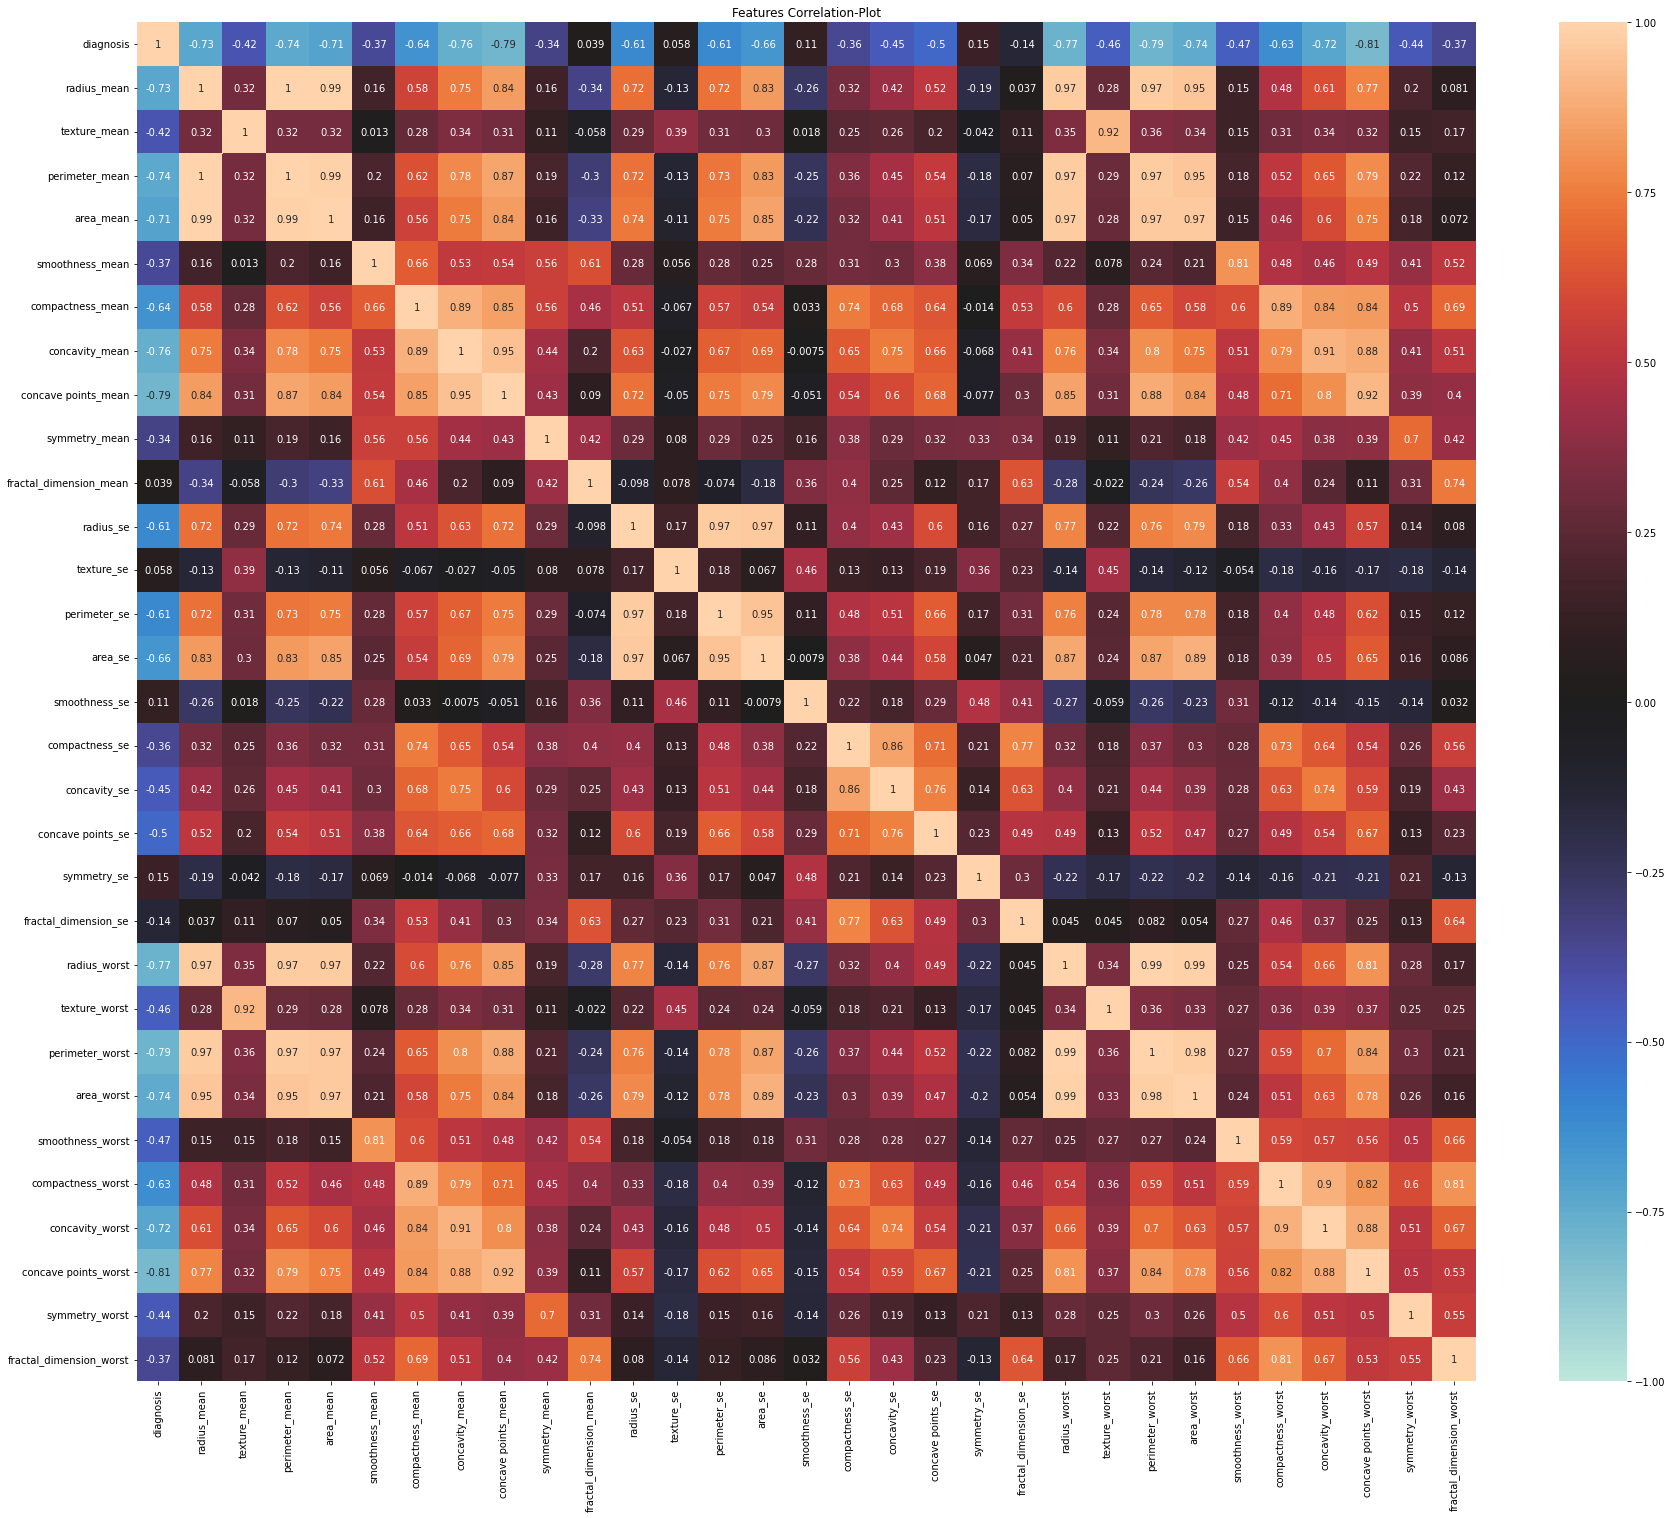

In [ ]:
#Checking the correlation

features = df.columns
plt.figure(figsize=[30,25])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0, annot=True) #, 
plt.show()

100%|██████████| 29/29 [00:11<00:00,  2.62it/s]


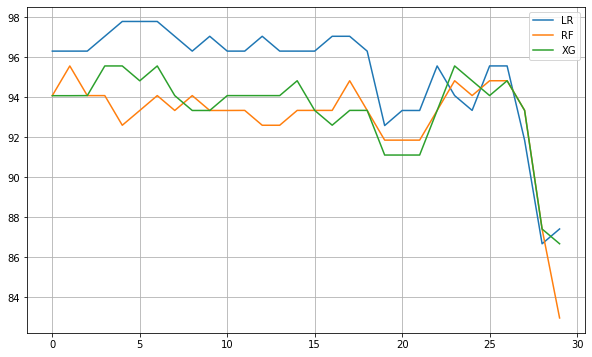

In [ ]:
# Calculate the VIFs to remove multicollinearity

DROP=[]; scores1=[]; scores2=[]; scores3=[]
#scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std)))
scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y, eval_metric='logloss').predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
        
for i in tqdm(range(len(X.columns.values)-1)):
    vif = pd.DataFrame()
    Xs = X.drop(DROP,axis=1)
    #print(DROP)
    vif['Features'] = Xs.columns
    vif['VIF'] = [variance_inflation_factor(Xs.values, i) for i in range(Xs.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    DROP.append(vif.Features[0])
    if vif.VIF[0]>1:
        scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
        scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
        scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y, eval_metric='logloss').predict(Test_X_std.drop(DROP,axis=1)),average='weighted')*100)
    #print(scores)
    
plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
plt.plot(scores3, label='XG')
#plt.ylim([0.7,0.85])
plt.legend()
plt.grid()
plt.show()

100%|██████████| 30/30 [00:15<00:00,  1.97it/s]


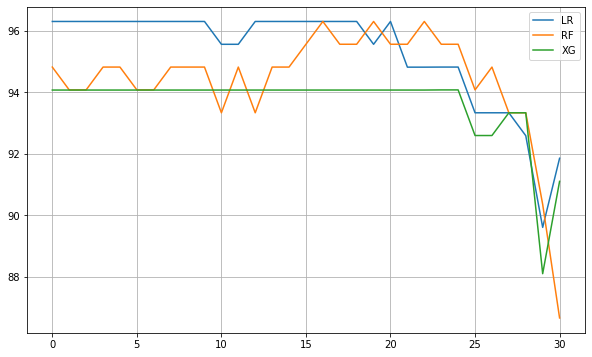

In [ ]:
# Applying Recurrsive Feature Elimination

# Running RFE with the output number of the variable equal to 10
LR = LogisticRegression()#.fit(Train_X_std, Train_Y)
scores1=[]; scores2=[]; scores3=[]
scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std, Train_Y, eval_metric='logloss').predict(Test_X_std),average='weighted')*100)

for i in tqdm(range(len(X.columns.values))):
    rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns)-i)   
    rfe = rfe.fit(Train_X_std, Train_Y)
    scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y, eval_metric='logloss').predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    
plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
plt.plot(scores3, label='XG')
#plt.ylim([0.80,0.84])
plt.legend()
plt.grid()
plt.show()

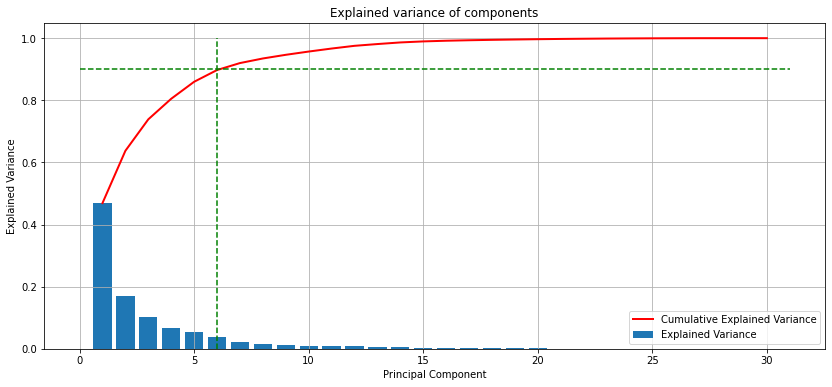

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(14,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.90,0.90],'g--')
plt.plot([6,6],[0,1], 'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.grid()
plt.legend()
plt.show()

100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


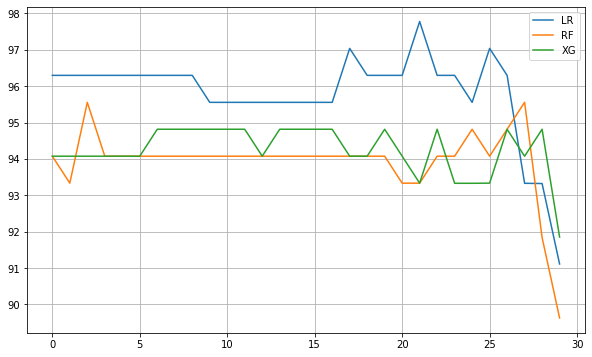

In [ ]:
#Applying PCA Transformations

# scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
# scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
# scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std, Train_Y, eval_metric='logloss').predict(Test_X_std),average='weighted')*100)

scores1=[]; scores2=[]; scores3=[]
for i in tqdm(range(len(X.columns.values))):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    #print('The shape of final transformed training feature set:')
    #print(Train_X_std_pca.shape)
    Train_X_std_pca = pd.DataFrame(Train_X_std_pca)

    Test_X_std_pca = pca.transform(Test_X_std)
    #print('\nThe shape of final transformed testing feature set:')
    #print(Test_X_std_pca.shape)
    Test_X_std_pca = pd.DataFrame(Test_X_std_pca)
    
    scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca),average='weighted')*100)
    scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca),average='weighted')*100)
    scores3.append(f1_score(Test_Y,XGBClassifier().fit(Train_X_std_pca, Train_Y, eval_metric='logloss').predict(Test_X_std_pca),average='weighted')*100)

    
plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
plt.plot(scores3, label='XG')
#plt.ylim([0.80,0.84])
plt.legend()
plt.grid()
plt.show()

In [ ]:
#### Finalising the shortlisted features

rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns)-17)   
rfe = rfe.fit(Train_X_std, Train_Y)

print(f1_score(Test_Y,LogisticRegression().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
print(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
print(f1_score(Test_Y,XGBClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y, eval_metric='logloss').predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    
Train_X_std = Train_X_std[Train_X_std.columns[rfe.support_]]
Test_X_std = Test_X_std[Test_X_std.columns[rfe.support_]]

print(Train_X_std.shape)
print(Test_X_std.shape)

96.29588976496389
96.29588976496389
94.06756206756208
(539, 13)
(135, 13)


In [ ]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((3,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Support Vector Machine (SVM)','K Nearest Neighbours (KNN)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Support Vector Machine (SVM),0.0,0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0,0.0


In [ ]:
#Let us define functions to summarise the Prediction's scores .

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob[:,1], multi_class='ovr'),3)*100 #[:, 1]
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100)) #
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

#Visualising Function
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 95.6%
F1 Score = 95.6%

 Confusiton Matrix:
 [[66  2]
 [ 4 63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        68
           1       0.97      0.94      0.95        67

    accuracy                           0.96       135
   macro avg       0.96      0.96      0.96       135
weighted avg       0.96      0.96      0.96       135



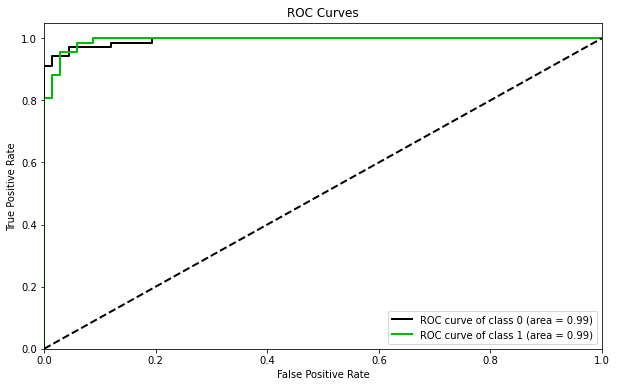


Interpreting the Output of Logistic Regression:

intercept  -2.9599904286422376
classes [0 1]


,coeff
area_mean,-0.695340
concavity_mean,-0.983209
concave points_mean,-2.056285
radius_se,-2.164486
area_se,-1.234332
compactness_se,1.900136
fractal_dimension_se,0.201385
radius_worst,-1.656111
texture_worst,-1.773550
perimeter_worst,-1.302329


In [ ]:
# Building Logistic Regression Classifier

LR_model = LogisticRegression()

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l2'] #'none', 'l1', 'l2', 'elasticnet'
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

LR = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,0)

print('\n\033[1mInterpreting the Output of Logistic Regression:\n\033[0m')

print('intercept ', LR.intercept_[0])
print('classes', LR.classes_)
display(pd.DataFrame({'coeff': LR.coef_[0]}, index=Train_X_std.columns))

<<<----------------------------------- Evaluating Support Vector Machine (SVM) ----------------------------------->>>

Accuracy = 97.8%
F1 Score = 97.8%

 Confusiton Matrix:
 [[66  2]
 [ 1 66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        68
           1       0.97      0.99      0.98        67

    accuracy                           0.98       135
   macro avg       0.98      0.98      0.98       135
weighted avg       0.98      0.98      0.98       135



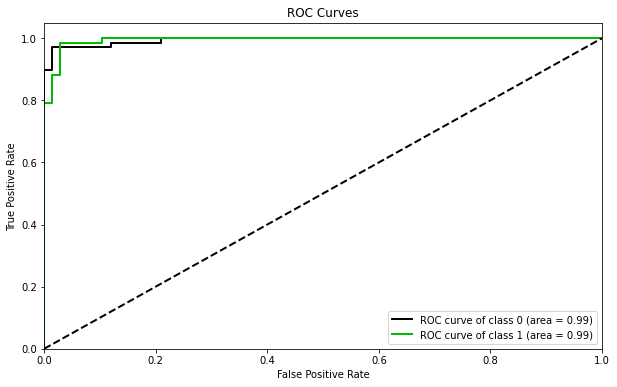

In [ ]:
# Building Support Vector Machine Classifier

SVM_model = SVC(probability=True).fit(Train_X_std, Train_Y)

svm_param = {"C": [.01, .1, 1, 5, 10, 100],             
             "gamma": [.01, .1, 1, 5, 10, 100],
             "kernel": ["rbf"],
             "random_state": [1]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(SVM_model, svm_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

SVM = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = SVM.predict(Test_X_std)
pred_prob = SVM.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,1)

<<<----------------------------------- Evaluating K Nearest Neighbours (KNN) ----------------------------------->>>

Accuracy = 95.6%
F1 Score = 95.6%

 Confusiton Matrix:
 [[66  2]
 [ 4 63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        68
           1       0.97      0.94      0.95        67

    accuracy                           0.96       135
   macro avg       0.96      0.96      0.96       135
weighted avg       0.96      0.96      0.96       135



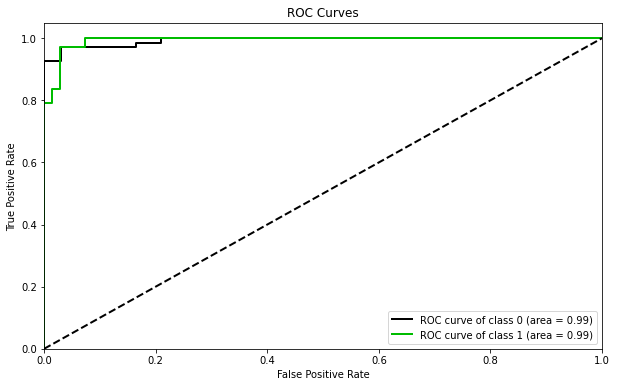

In [ ]:
# Building K-Neareset Neighbours Classifier

KNN_model = KNeighborsClassifier()

knn_param = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(KNN_model, knn_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

KNN = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = KNN.predict(Test_X_std)
pred_prob = KNN.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,2)

In [ ]:
#Plotting Confusion-Matrix of all the predictive Models

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models)*len(labels)/14)])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/3),3,i+1)
        pred = all_models[i].predict(Test_X_std)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='Blues', fmt='.0f') #vmin=0,vmax=5
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

                                    ML Algorithms Comparison                                    


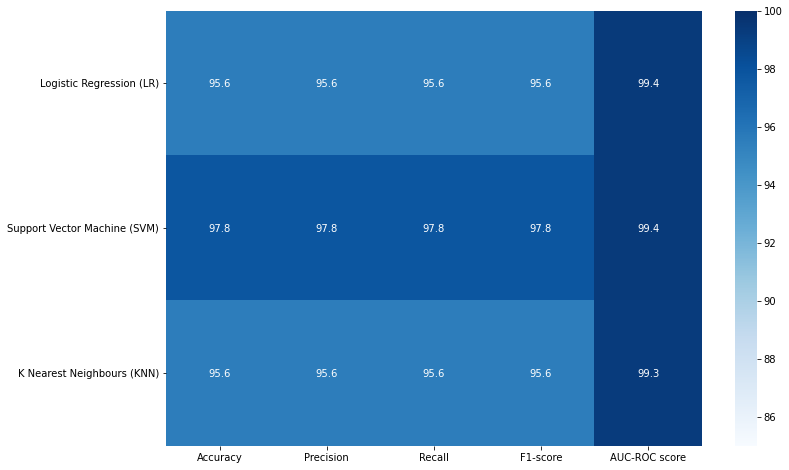

In [ ]:
print('\033[1mML Algorithms Comparison'.center(100))
plt.figure(figsize=[12,8])
sns.heatmap(Evaluation_Results, annot=True, vmin=85, vmax=100, cmap='Blues', fmt='.1f')
plt.show()